<h1><center> Image Reduction, Alignment, and RGB </center></h1>
<h3><center> Author: Francisco Mendez </center></h3>

<p> 
    In this notebook, we will re-visit some of the methods we have already learned to perform image reduction, alignment, and combination to generate a final RGB image. We will show you alternative methods that you can use to align your images, as well as how you can make the color of your images pop.
</p>

<h1> Reading the Data and Make a List of Files <a id="read_data"> </a> </h1>

<p>
    Let's start by familiarizing ourselves with the data we are going to be working with. It is a good practice to have the data organized in a directory in such way that it is intuitive for us to open it in the notebook and later analyze it.

Ideally the directory where you stored your data should look like the following:
- Lab
    - Data
        - Biases
        - Darks
        - Science
        - Flats

Assuming your Jupiter notebook is stored in the *Lab* directory, this is how you will define the directory paths to access each of your data files:
    
</p>

In [1]:
# Define the directory paths to the different data files. Make sure you end the string name with a "/" to close the path
biases_dir = "./Data/Biases/"
flats_dir = "./Data/Flats/"
darks_dir = "./Data/Darks/"
science_dir = "./Data/Science/"

Now let's see what kind of data are stored in one of this directories. We'll take the *Biases* directory as an example. 

in order to list the files in a directory we can use the Python module `glob`. So let's import the modules and create a list of files in this directory that end with "fit"

In [2]:
import glob

# List only the files inside the Biases directory that are .fit
biases_list = glob.glob(f"{biases_dir}*fit")

print(f"There are {len(biases_list)} files in the {biases_dir} directory")
biases_list

There are 10 files in the ./Data/Biases/ directory


['./Data/Biases\\Bias_horsehead_nebula_0sec_Bin4_filter-Clear_-4.4C_gain0_2024-02-14_212007_frame0001.fit',
 './Data/Biases\\Bias_horsehead_nebula_0sec_Bin4_filter-Clear_-4.4C_gain0_2024-02-14_212007_frame0002.fit',
 './Data/Biases\\Bias_horsehead_nebula_0sec_Bin4_filter-Clear_-4.4C_gain0_2024-02-14_212008_frame0003.fit',
 './Data/Biases\\Bias_horsehead_nebula_0sec_Bin4_filter-Clear_-4.4C_gain0_2024-02-14_212008_frame0004.fit',
 './Data/Biases\\Bias_horsehead_nebula_0sec_Bin4_filter-Clear_-4.4C_gain0_2024-02-14_212009_frame0005.fit',
 './Data/Biases\\Bias_horsehead_nebula_0sec_Bin4_filter-Clear_-4.4C_gain0_2024-02-14_212011_frame0010.fit',
 './Data/Biases\\Bias_horsehead_nebula_0sec_Bin4_filter-Clear_-4.9C_gain0_2024-02-14_212009_frame0006.fit',
 './Data/Biases\\Bias_horsehead_nebula_0sec_Bin4_filter-Clear_-4.9C_gain0_2024-02-14_212010_frame0007.fit',
 './Data/Biases\\Bias_horsehead_nebula_0sec_Bin4_filter-Clear_-4.9C_gain0_2024-02-14_212010_frame0008.fit',
 './Data/Biases\\Bias_horseh

Once you have your list of files you can use the `fits.getdata()` from the module `astropy` to read your images' data. Also, if you want to know specific information about your collected data, such as the exposure time you used to collect the data, you can read in the header of your fits files with the `fits.getheader()` function.

Let's see how does the code looks like:

In [3]:
from astropy.io import fits

# Read in the header information of the first file of the biases_list
header_info = fits.getheader(biases_list[0])

header_info

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2072 / length of data axis 1                          
NAXIS2  =                 1411 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / physical = BZERO + BSCALE*array_value          
BSCALE  =                    1 / physical = BZERO + BSCALE*array_value          
XBINNING=                    4 / Binning factor in width                        
YBINNING=                    4 / Binning factor in height                       
EXPOINUS=                   

This is what the header of a fits file looks like, sometimes it's more dense than this. Now, if you want to acces the specific value of any item in the header, you can index it like this:

In [4]:
# Extract the exposure time that was used to collect the image
exp_time = header_info["EXPTIME "]

exp_time

3.2e-05

Now, let's read in the image data from this same file:

In [5]:
image_data = fits.getdata(biases_list[0])

image_data

array([[1924, 1916, 1914, ..., 1915, 1916, 1918],
       [1909, 1912, 1919, ..., 1915, 1910, 1914],
       [1917, 1916, 1914, ..., 1919, 1911, 1913],
       ...,
       [1916, 1922, 1919, ..., 1919, 1920, 1917],
       [1917, 1923, 1911, ..., 1921, 1919, 1918],
       [1917, 1917, 1924, ..., 1914, 1913, 1920]], dtype=uint16)

Clearly, this doesn't look like an actual image, but that's what an image is, just a list of numbers. In the following section we'll explore how we can display this data in different ways.

<h1> Visualizing FITS Files Data </h1>


As we just saw, fits files data is just a list of numbers, but we can display these numbers into an actual image using `matplotlib`'s function `imshow`. Let's explore this function by plotting one of our science images of M44 (The Beehive Cluster).

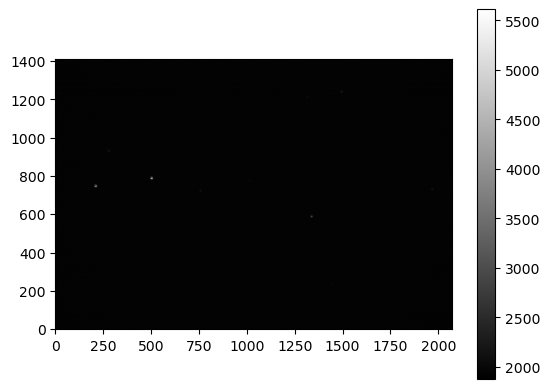

In [6]:
import matplotlib.pyplot as plt

# Read in a fits file with the M44 data. For the sake of this part of the tutorial, we're just going to hard-code it
# but a more readable version will be provided in later sections
m44_data = fits.getdata(f"{science_dir}Beehive/Light_horsehead_nebula_2sec_Bin4_filter-V_-4.9C_gain0_2024-02-14_210930_frame0001.fit")

# Display the M44 data
plt.imshow(m44_data, cmap='gray', origin='lower')

plt.colorbar()
plt.show()

This is probably not the best way to display our data since we cannot see the stars in the cluster with clarity. Python usually displays the image information in a linear scale, which leads to a lot of the information being lost in the visualization process. There are different ways we can make the information in the image pop:

- Using the `vmin` and `vmax` parameters from `imshow`
- Normalize or Re-scaling the image 

Let's look at both of these methods and see how they change our data:

<h2> vmin and vmax </h2>

Notice how in the color bar of our image above the values range between 2000 and 5500. These values represent the ADU/pixel or "Counts" of our data. `vmin` would be in this case the lower bound of the data and `vmax` the upper bound. By changing these numbers we can expect the data to be displayed differently.

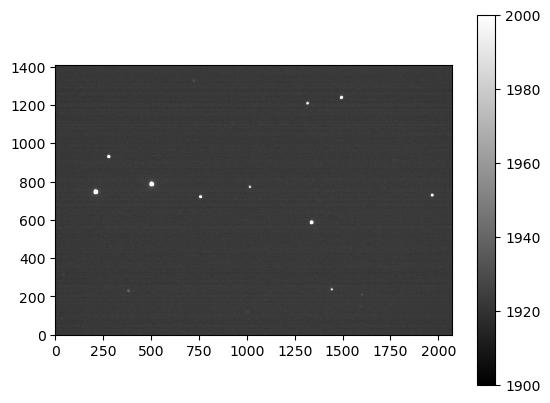

In [7]:
# Display the image again by defining the vmin and vmax values based on the values from the color bar above
plt.imshow(m44_data, cmap='gray', origin='lower', vmin=1900, vmax=2000)

plt.colorbar()
plt.show()

This looks much better, now we can actually see more stars in the cluster. Playing with the `vmin` and `vmax` will highlight different sections of the image relative to the background. But, there are much more efficient ways to do this instead of randomly selecting numbers, such as re-normalize the image to a different scale. We will explore this option next.

<h2> ZScale Normalization </h2>

When you are collecting data through the ASIImg software, it displays the data in a particular scale called *ZScale*, which facilitates the user's visualization of the collected data. We can implement the same normalization to our data using `astropy.visualization`.

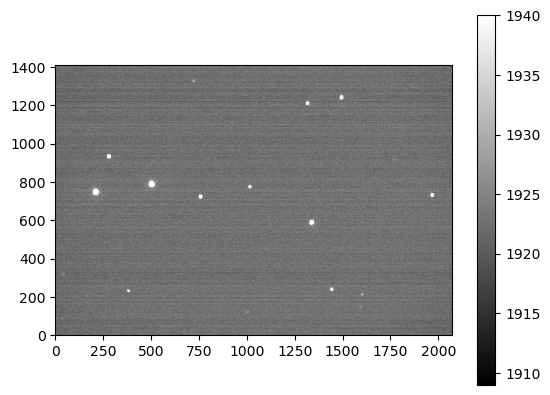

In [8]:
from astropy.visualization import ZScaleInterval, ImageNormalize

# Normalize the M44 data to ZScale
m44_norm = ImageNormalize(m44_data, interval=ZScaleInterval())

# Display the normalize data
plt.imshow(m44_data, cmap='gray', origin='lower', norm=m44_norm)

plt.colorbar()
plt.show()

That looks even better now. 

These are some options that you can use to visualize your data. Depending on the object that you observed, a different method might work better than others. You are encouraged to try different methods until the data looks like you want it to. 

Based on the ZScale normalized image, we can see that the background has a random gradient, and we can assume that all our collected data has this type of gradient. Next, we are going to learn how we can remove these gradients and noise from our science data by performing data reduction.

<h1> Image Reduction </h1>

As we have learned before, astronomical data comes with different noise sources that we can account for with the calibration frames we collected with our data (Biases, Darks, and Flats). In this section we will learn how to do image reduction of our science data and remove some of the noise sources.

We can perform image reduction by using the following formula:

<div style="text-align:center; font-size:20px;">
    $I_{reduced} = \frac{S - D}{F_{norm}}$
</div>  

Where $S$ is the science image, $D$ is the **Master Dark**, and $F_{norm}$ is the normalized **Master Flat**. 

<h2> Master Bias frame </h2>

The first noise source we are going to remove is the read noise. We are going to use our bias frames to get rid of this noise source by median combining all our bias frames into one and generate what is called a **Master Bias Frame**.

These are the steps to create a Master Bias:

1. Create the list of all the file names for the Bias frames only
2. Open the data from all the files and put the information into a list
3. Take the median of the list of files on the axis where the data is stored

We have already done step 1 in the a previous section, so, we are just going to copy-paste that code here

In [9]:
import numpy as np

# 1. Create the list of all the file names for the Bias frames only
biases_file_list = glob.glob(f"{biases_dir}*fit")

# 2. Open the data from all the files and put the information into a list
biases = np.array([fits.getdata(file) for file in biases_file_list])

# Display the shape of the array so we know which axis we should be taking the median for
biases.shape

(10, 1411, 2072)

For step 3, we know based on the shape of our list of bias data that there are a total of 10 bias frames. The other 2 numbers in the tupple above represent the size of the image in the y and x axis respectively. Thus, in order to create the master bias, we chould take the median of the list for `axis=0` as follows:

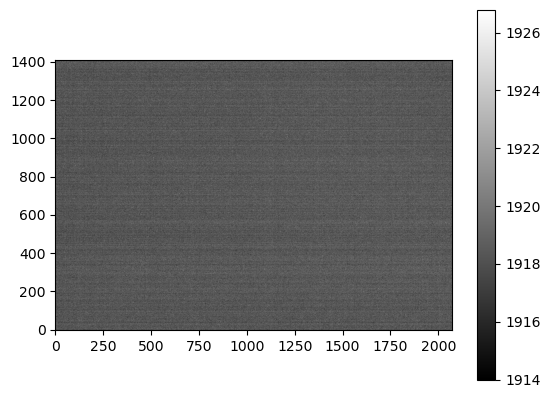

In [10]:
# 3. Take the median of the list of files on the axis where the data is stored
master_bias = np.median(biases, axis=0)

# Display the master bias frame using ZScale normalization
master_bias_zscale_norm = ImageNormalize(master_bias, interval=ZScaleInterval())

plt.imshow(master_bias, cmap='gray', origin='lower', norm=master_bias_zscale_norm)
plt.colorbar()

plt.show()

We have only generated the Master Bias frame, but we haven't actually removed the Read Noise from any images yet. That's what we are going to take care of in the next section when we talk about **Flat Frames**

<h2> Normalized Master Flats </h2>

After we have generated our Master Bias frame, now we can move on the the Master Flat creation. A Master Flat is responsible from removing any dust grains that are located on top of the telscope, detector filters, or detector chip, as well as removing any gradient that your science images might have. These dust grains typically look like *doughnuts* on your images. On the other hand, the gradient effect typically looks like a *vignetting* effect at the edges of your science data. You can remove these by dividing your science data by the normalized master flat frame. We will get to that later, for now, these are the steps to follow in order to create a normalized Master Flat:

1. Create a list of all the file names for the flat frames for each corresponding filter
2. Open the data from all the files and put the information into a list
3. Subtract the Master Bias from each individual flat frame before median combining them
4. Take the median of the list of files on the axis where the data is stored. This will create the Master Flat
5. Normalize your Master Flat by dividing by its mean value

Note that we have collected data using different filters, and each filter will yield a different gradient. Thus, we must repeat these steps for all of the filters we collected data for. For this tutorial, we are using data collected in the B, V, R, I, and H alpha filters. Keep in mind that you might have used more or less of these filters depending on the objects you observed. Inside the Flats directory, we have stored the flats for each filter in another directory with the filter name. This makes it easier when we want to read in the data later. So, let's follow these steps for all the filters.

In [11]:
# 1. Create a list of all the file names for the flat frames
flats_b_file_list = glob.glob(f"{flats_dir}/B/*fit")
flats_v_file_list = glob.glob(f"{flats_dir}/V/*fit")
flats_r_file_list = glob.glob(f"{flats_dir}/R/*fit")
flats_i_file_list = glob.glob(f"{flats_dir}/I/*fit")
flats_halpha_file_list = glob.glob(f"{flats_dir}/Halpha/*fit")

# 2. Open the data from all the files and put the information into a list
# 3. Subtract the Master Bias from each individual flat frame before median combining them
# Yes, we can do this in a single line of code. Let's see how to do that
flats_b = np.array([fits.getdata(file) - master_bias for file in flats_b_file_list])
flats_v = np.array([fits.getdata(file) - master_bias for file in flats_v_file_list])
flats_r = np.array([fits.getdata(file) - master_bias for file in flats_r_file_list])
flats_i = np.array([fits.getdata(file) - master_bias for file in flats_i_file_list])
flats_halpha = np.array([fits.getdata(file) - master_bias for file in flats_halpha_file_list])

# 4. Take the median of the list of files on the axis where the data is stored. This will create the Master Flat
# We already know that our method will store all the images in axis=0, so that's what we are going to take the median of
master_flat_b = np.median(flats_b, axis=0)
master_flat_v = np.median(flats_v, axis=0)
master_flat_r = np.median(flats_r, axis=0)
master_flat_i = np.median(flats_i, axis=0)
master_flat_halpha = np.median(flats_halpha, axis=0)

# 5. Normalize your Master Flat by dividing by its mean value
norm_master_flat_b = master_flat_b / np.mean(master_flat_b)
norm_master_flat_v = master_flat_v / np.mean(master_flat_v)
norm_master_flat_r = master_flat_r / np.mean(master_flat_r)
norm_master_flat_i = master_flat_i / np.mean(master_flat_i)
norm_master_flat_halpha = master_flat_halpha / np.mean(master_flat_halpha)

Based on the image reduction formula, we are going to be dividing our science images by the master flats. However, because we know our Flat frames on average have ~30,000 counts, this process will reduce the counts we have in our science images, which is not good. That is why we normalized the Master Flat frames to 1, so that at the end we only divide the science images by 1. We can see what is the mean value of the normalized Master Flats to corroborate this information.

In [12]:
print(f"Mean Normalized Master Flat B: {np.mean(norm_master_flat_b)} ADU/pixel \
       \nMean Normalized Master Flat V: {np.mean(norm_master_flat_v)} ADU/pixel \
       \nMean Normalized Master Flat R: {np.mean(norm_master_flat_r)} ADU/pixel \
       \nMean Normalized Master Flat I: {np.mean(norm_master_flat_i)} ADU/pixel \
       \nMean Normalized Master Flat Halpha: {np.mean(norm_master_flat_halpha)} ADU/pixel")

Mean Normalized Master Flat B: 1.0000000000000002 ADU/pixel        
Mean Normalized Master Flat V: 0.9999999999999996 ADU/pixel        
Mean Normalized Master Flat R: 1.0000000000000002 ADU/pixel        
Mean Normalized Master Flat I: 1.0000000000000002 ADU/pixel        
Mean Normalized Master Flat Halpha: 0.9999999999999993 ADU/pixel


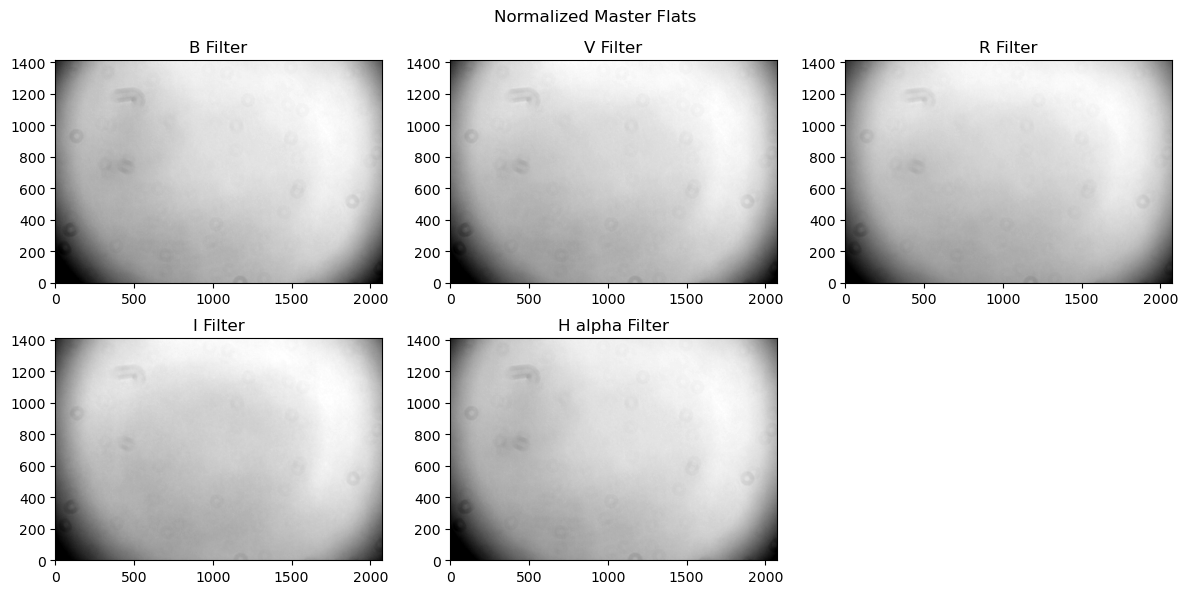

In [13]:
# Visualize the Normalized Master Flats for all the filters using ZScale Normalization
norm_master_flat_b_zscale_norm = ImageNormalize(norm_master_flat_b, interval=ZScaleInterval())
norm_master_flat_v_zscale_norm = ImageNormalize(norm_master_flat_v, interval=ZScaleInterval())
norm_master_flat_r_zscale_norm = ImageNormalize(norm_master_flat_r, interval=ZScaleInterval())
norm_master_flat_i_zscale_norm = ImageNormalize(norm_master_flat_i, interval=ZScaleInterval())
norm_master_flat_halpha_zscale_norm = ImageNormalize(norm_master_flat_halpha, interval=ZScaleInterval())

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 6), tight_layout=True)

ax[0,0].imshow(norm_master_flat_b, cmap='gray', origin='lower', norm=norm_master_flat_b_zscale_norm)
ax[0,1].imshow(norm_master_flat_v, cmap='gray', origin='lower', norm=norm_master_flat_v_zscale_norm)
ax[0,2].imshow(norm_master_flat_r, cmap='gray', origin='lower', norm=norm_master_flat_r_zscale_norm)
ax[1,0].imshow(norm_master_flat_i, cmap='gray', origin='lower', norm=norm_master_flat_i_zscale_norm)
ax[1,1].imshow(norm_master_flat_halpha, cmap='gray', origin='lower', norm=norm_master_flat_halpha_zscale_norm)

ax[0,0].set_title("B Filter")
ax[0,1].set_title("V Filter")
ax[0,2].set_title("R Filter")
ax[1,0].set_title("I Filter")
ax[1,1].set_title("H alpha Filter")

fig.suptitle('Normalized Master Flats')

ax[1,2].axis('off')

plt.show()

We can see that basically all these Flat Frames look the same for each filter. But virtually they are different and we will see that once we fully reduce our images. The main thing here is to see the features that we mentioned above, such as the dust grains on the telescope that look like doughnuts and the vignetting.

Now, we will create our final set of calibration frames, the **Master Darks**

<h2> Master Darks </h2>

We've seen in the past that our science images have the contribution from thermal noise caused by the detector called the Dark Current, and this noise source varies as a function of the exposure time that the science images were collected. Therefore, we should have a Master Dark frame for each of the exposure times of our science images, so we can remove the corresponding dark current contribution.

In order to create these Master Dark frames, we can follow the same steps that we used to generate our Master Bias, but we will repeat these for each of the exposure times of our science images.

**NOTE**

It is important that for every observing night you keep an observing log where you write down the objects you observed, the filters you used, and the exposure times you used to collect the data. That way is much easier to complete this part of the process. 

The data we are using for this notebook has the following observing log:

**Jupiter**

- B Filter - 0.001 sec
- V Filter - 0.001 sec
- R Filter - 0.001 sec
- I Filter - 0.003 sec

**Horse Head Nebula**

- B Filter - 60 sec
- V Filter - 60 sec
- R Filter - 60 sec
- Halpha Filter - 60 sec

Based on this information, we should create a Master Dark for 3 different exposure times (0.001, 0.003, and 60 seconds). Let's do that following the steps mentioned previously

**Note 2**

As we have done before, we typically named our variables in Python based on what they represent (e.g. master_flat_b, which represent the master flat for the B filter) and the Dark Frames are not going to be the exception. However, be mindful that Python does not like when you put periods in variable names (e.g. master_dark_0.001s). Instead, in order to deal with periods, you can use other letters like "p" for period, or "d" for dot, so it would look more like this: master_dark_0p001s).


In [14]:
# 1. Create the list of all the file names for the Bias frames only
darks_file_list = glob.glob(f"{darks_dir}*fit")

# 2. Open the data from all the files and put the information into a list
# Use the header information of the fits files to access only the data for the corresponding exopsure time.
# We can do that by using an IF statement
darks_0p001s = np.array([fits.getdata(file) for file in darks_file_list if fits.getheader(file)['EXPTIME'] == 0.001])
darks_0p003s = np.array([fits.getdata(file) for file in darks_file_list if fits.getheader(file)['EXPTIME'] == 0.003])
darks_60s = np.array([fits.getdata(file) for file in darks_file_list if fits.getheader(file)['EXPTIME'] == 60])

# 3. Take the median of the list of files on the axis where the data is stored
master_dark_0p001s = np.median(darks_0p001s, axis=0)
master_dark_0p003s = np.median(darks_0p003s, axis=0)
master_dark_60s = np.median(darks_60s, axis=0)

The above trick to access all the dark frame files for each exposure time in a single line of code using the for loop and the if statement only works well if you have all the Dark Frames you collected in a single directory. In our case, they are all stored in the ./Data/Darks/ directory that we defined in the first cells of the notebook.

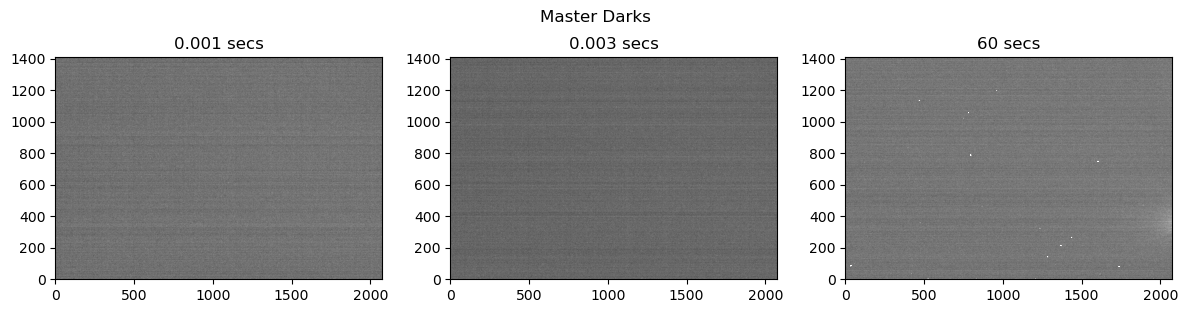

In [15]:
# Visualize the Master Darks for all the exposure times using ZScale Normalization
master_dark_0p001s_zscale_norm = ImageNormalize(master_dark_0p001s, interval=ZScaleInterval())
master_dark_0p003s_zscale_norm = ImageNormalize(master_dark_0p003s, interval=ZScaleInterval())
master_dark_60s_zscale_norm = ImageNormalize(master_dark_60s, interval=ZScaleInterval())

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3), tight_layout=True)

ax[0].imshow(master_dark_0p001s, cmap='gray', origin='lower', norm=master_dark_0p001s_zscale_norm)
ax[1].imshow(master_dark_0p003s, cmap='gray', origin='lower', norm=master_dark_0p003s_zscale_norm)
ax[2].imshow(master_dark_60s, cmap='gray', origin='lower', norm=master_dark_60s_zscale_norm)

ax[0].set_title("0.001 secs")
ax[1].set_title("0.003 secs")
ax[2].set_title("60 secs")

fig.suptitle('Master Darks')

plt.show()

From the Master Darks above, we can see that the first 2 are virtually the same, whereas the 60 seconds one has a little bit more of a brighted gradient to is. Let's look at their mean values and see if they are also different.

In [16]:
print(f"Master Dark 0.001 secs: {np.mean(master_dark_0p001s)} ADU/pixel \
       \nMaster Dark 0.003 secs: {np.mean(master_dark_0p003s)} ADU/pixel \
       \nMaster Dark 60 secs: {np.mean(master_dark_60s)} ADU/pixel")

Master Dark 0.001 secs: 1918.3008665367809 ADU/pixel        
Master Dark 0.003 secs: 1918.3779097767404 ADU/pixel        
Master Dark 60 secs: 1919.1957427712211 ADU/pixel


Perhaps not, so this gradient might be coming from another factor, such as the number of frames that were collected for each exposure time. That will have an effect on what the Master Dark (or any other calibration frame really) would look like. **The more the better.**

Now that we have created all of our calibration frames, we can move on to reduce our science images.

<h2> Reducing Science Images </h2>

Before we start with the image reduction process, we need to figure out what are the objects we observed that we want to perform the image reduction for. In our case, we want to create color image of Jupiter and the Horse Head nebula. Ideally, we want to put the files of the science frames for each filter in their corresponding list or directory so that it's easier to access them later. All my science imges are stored in the corresponding object directory, but they are not stored in their corresponding filter. So, we are going to create a list of files for the respective filter that the science images were collected at.

For Jupiter we know we collected data on the filters B, V, I, and R, whereas for the the Horse Head Nebula we have data in the filters B, V, R, and Halpha. Also, we have noted above the respective exposure time for each filter, which makes the process easier when we are reducing the data.

**Note**

You might have to modify the code below to access the science images per filter based on the name that is given in your file names. If you named your filters B, V, R, I, etc in the ASIImg software, then this code should work for you, else, you may need to modify the code below to access the right data.

In [30]:
# Separate the science image of Jupiter and the Horse head nebula into their respective filters
jupiter_b = glob.glob(f"{science_dir}Jupiter/*filter-B*.fit")
jupiter_v = glob.glob(f"{science_dir}Jupiter/*filter-V*.fit")
jupiter_r = glob.glob(f"{science_dir}Jupiter/*filter-R*.fit")
jupiter_i = glob.glob(f"{science_dir}Jupiter/*filter-I*.fit")

horsehead_b = glob.glob(f"{science_dir}Horsehead/*filter-B*.fit")
horsehead_v = glob.glob(f"{science_dir}Horsehead/*filter-V*.fit")
horsehead_r = glob.glob(f"{science_dir}Horsehead/*filter-R*.fit")
horsehead_halpha = glob.glob(f"{science_dir}Horsehead/*filter-Halpha*.fit")

Now that each science image is in their respective list, we can reduce them. We can perform the image reduction in a single line of code as long as we know what data and calibration frames we want to use. This code looks like the following:

In [32]:
# Reduce the Science Jupiter images
reduced_jupiter_b = [(fits.getdata(file) - master_dark_0p001s) / norm_master_flat_b for file in jupiter_b]
reduced_jupiter_v = [(fits.getdata(file) - master_dark_0p001s) / norm_master_flat_v for file in jupiter_v]
reduced_jupiter_r = [(fits.getdata(file) - master_dark_0p001s) / norm_master_flat_r for file in jupiter_r]
reduced_jupiter_i = [(fits.getdata(file) - master_dark_0p003s) / norm_master_flat_i for file in jupiter_i]

# Reduce the images of the Horse Head Nebula
reduced_horsehead_b = [(fits.getdata(file) - master_dark_60s) / norm_master_flat_b for file in horsehead_b]
reduced_horsehead_v = [(fits.getdata(file) - master_dark_60s) / norm_master_flat_v for file in horsehead_v]
reduced_horsehead_r = [(fits.getdata(file) - master_dark_60s) / norm_master_flat_r for file in horsehead_r]
reduced_horsehead_halpha = [(fits.getdata(file) - master_dark_60s) / norm_master_flat_halpha for file in horsehead_halpha]

Let's take a look now at how does the reduced data look like

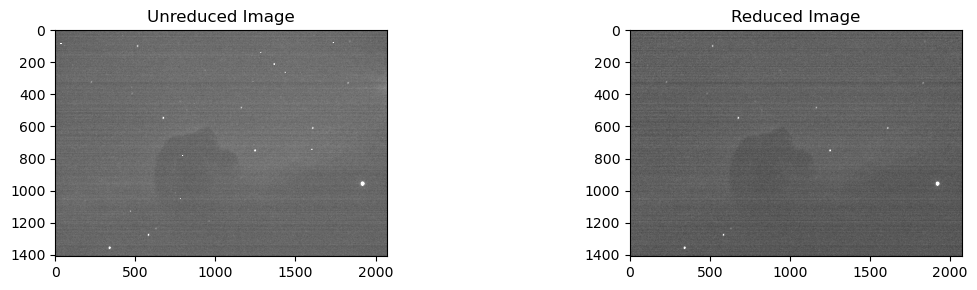

In [62]:
# Plot the reduced data and compare it to the not reduced one
norm_unreduced_horsehead = ImageNormalize(fits.getdata(horsehead_halpha[0]), interval=ZScaleInterval())
norm_reduced_horsehead = ImageNormalize(reduced_horsehead_halpha[0], interval=ZScaleInterval())

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3), tight_layout=True)

ax[0].imshow(fits.getdata(horsehead_halpha[0]), cmap='gray', norm=norm_unreduced_horsehead)
ax[1].imshow(reduced_horsehead_halpha[0], cmap='gray', norm=norm_reduced_horsehead)

ax[0].set_title('Unreduced Image')
ax[1].set_title('Reduced Image')

plt.show()

It can be seen from the two images, which both have been stretched to ZScale, that there is a clear difference between the un-reduced image and the reduced one. Overall the reduced looks darker, which reflects a reduction from the noise coming from the detector and the internal reflection from the telescope itself.

This is how easy we can do image reduction after we have all the necessary materials. Now, we are one step closer to make a color image. The next step is to align and combine our reduced science images, which is what we are going to learn in the following section.

<h1> Image Alignment and Reduction </h1>

Perhaps you noticed while you were out at the observatory that your telescope wasn't tracking properly, and every image you were collecting had your object at different places of the image frame usually slewing in a particular direction. We can account for these tracking issues by aligning our images to a reference image per object for each individual filter. This is a **required** step when creating a color image since the goal is to combine all of our images into a single one, but in order to do that, we need these to be perfectly aligned. In this section, we are going to see how we can align our data.

<h2> Rolling Images </h2>

As you have seen before, images are just 2D arrays that contain information. We can actually move the position of where this information is located in the array along the X-Y plane. This method is callad rolling an array, and we can use it to align the images based on the position of the brightest pixel. This is a brief description on how this process works:

1. Define a reference image that you want all of your images in your list to be aligned to. This is typically the first image of the list
2. find the location (X and Y coordinates) of the brightest pixel in the image. This can be done with the `Numpy` function `unravel_index`.
3. Loop through the rest of the images in the list (except for the reference one) and find the position of the brightest pixel.
4. Find the pixel position difference between the reference pixels and the target pixels to find the image shift.
5. Use the `np.roll()` function to roll the target image by the pixel difference that was calculated earlier. Remember that `axis=0` refers to the y-axis and `axis=1` refers to the x-axis.
6. Store all the aligned images (including the reference image) into a list. We are going to use them later.

Since this is a process we have to repeat several times, it would be easier if we create a Python function that we can call several times, instead of having to copy the same code one and over again.

In [381]:
# Define a function that aligns the reduced science images
def align_images(reduced_science_data):
    """
    Align a list of reduced science images based on the brightest point in each image.

    Parameters:
    - reduced_science_data (list): List of 2D arrays containing reduced science image data.

    Returns:
    - ndarray: Array containing aligned science image frames.

    Notes:
    - This function aligns each science image in the list to the reference image (first image in the list).
    - It calculates the position of the brightest point in the reference image and interpolates over all frames to find the position in each frame.
    - Each frame is shifted to align with the reference frame based on the calculated pixel shift.
    - The aligned frames are returned as an array.

    Example:
    >>> aligned_frames = align_images(reduced_science_data)
    """
    
    # Define the reference image to use for alignment
    reference_frame = reduced_science_data[0]

    # Calculate the x,y pixel position of the brightest point in the reference image
    reference_ypix, reference_xpix = np.unravel_index(reference_frame.argmax(), reference_frame.shape)

    # Interpolate over all the frames (except the first one) to find the x,y pixel position of each frame
    aligned_frames = [reference_frame]

    for target_frame in reduced_science_data[1:]:

        # Calculate the x,y pixel position of the target frame
        target_ypix, target_xpix = np.unravel_index(target_frame.argmax(), target_frame.shape)

        # Calculate the pixel shift between the reference frame and the target frame
        xpix_shift, ypix_shift = (reference_xpix - target_xpix), (reference_ypix - target_ypix)

        # Shift the image in the y-axis
        ypix_shifted_frame = np.roll(target_frame, ypix_shift, axis=0)

        # Shift the y-pixel shifted image on the x-axis 
        aligned_frame = np.roll(ypix_shifted_frame, xpix_shift, axis=1)

        # Add the aligned frame to the list
        aligned_frames.append(aligned_frame)
        
    return np.array(aligned_frames)

# Align the reduced science images of Jupiter and the Horse Head Nebula using the align_images function
aligned_reduced_jupiter_b = align_images(reduced_jupiter_b)
aligned_reduced_jupiter_v = align_images(reduced_jupiter_v)
aligned_reduced_jupiter_r = align_images(reduced_jupiter_r)
aligned_reduced_jupiter_i = align_images(reduced_jupiter_i)

aligned_reduced_horsehead_b = align_images(reduced_horsehead_b)
aligned_reduced_horsehead_v = align_images(reduced_horsehead_v)
aligned_reduced_horsehead_r = align_images(reduced_horsehead_r)
aligned_reduced_horsehead_halpha = align_images(reduced_horsehead_halpha)

Now that all the images have been aligned for each filter we can move on to the next step, which is creating a master image of the science data for our objects in every filter we collected data on. So, we should have a single frame per object per filter. The best way to do this is by median combining our images. We are going to do that in the cell bellow

In [51]:
# Median-combine the aligned reduced science images of Jupiter and the Horse Head Nebula
final_jupiter_b = np.median(aligned_reduced_jupiter_b, axis=0)
final_jupiter_v = np.median(aligned_reduced_jupiter_v, axis=0)
final_jupiter_r = np.median(aligned_reduced_jupiter_r, axis=0)
final_jupiter_i = np.median(aligned_reduced_jupiter_i, axis=0)

final_horsehead_b = np.median(aligned_reduced_horsehead_b, axis=0)
final_horsehead_v = np.median(aligned_reduced_horsehead_v, axis=0)
final_horsehead_r = np.median(aligned_reduced_horsehead_r, axis=0)
final_horsehead_halpha = np.median(aligned_reduced_horsehead_halpha, axis=0)

Let's now take a look at how these reduced, aligned, and median combined images look like. For Jupiter we are going to zoom in into the image, so we can see the planet in more detail. Also, since the Jupiter data is bright enough, we can just display it using Python's default linear visualization instead of stretching the image. We should be able to see enough detail.

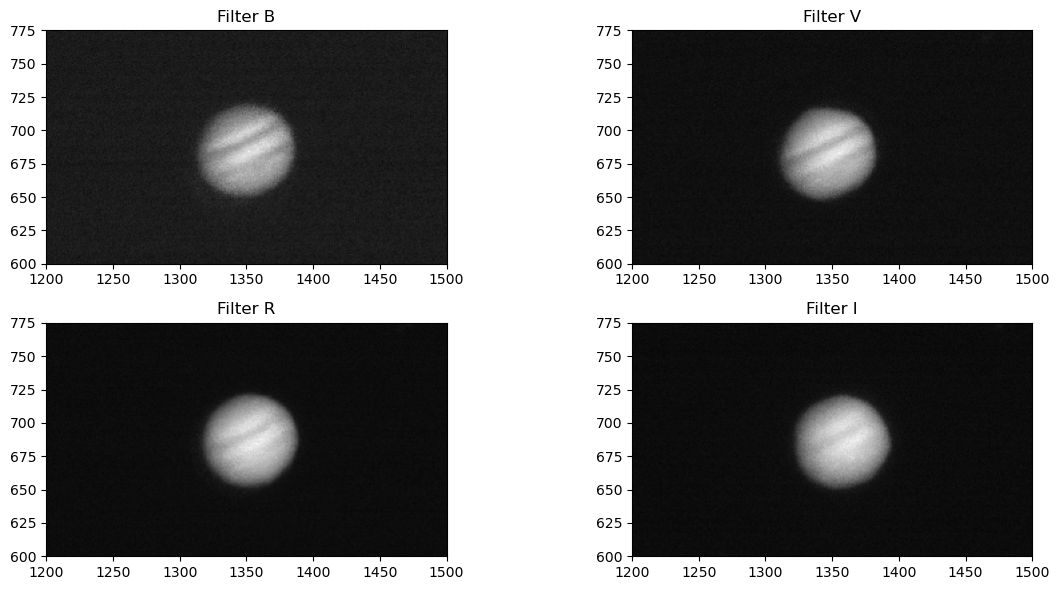

In [66]:
# Display the reduced, aligned, and combined images of Jupiter
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6), tight_layout=True)

ax[0,0].imshow(final_jupiter_b, cmap='gray')
ax[0,1].imshow(final_jupiter_v, cmap='gray')
ax[1,0].imshow(final_jupiter_r, cmap='gray')
ax[1,1].imshow(final_jupiter_i, cmap='gray')

# Clip the image to zoom in into the desired object
ax[0,0].set_xlim(1200, 1500)
ax[0,0].set_ylim(600, 775)

ax[1,0].set_xlim(1200, 1500)
ax[1,0].set_ylim(600, 775)

ax[0,1].set_xlim(1200, 1500)
ax[0,1].set_ylim(600, 775)

ax[1,1].set_xlim(1200, 1500)
ax[1,1].set_ylim(600, 775)

ax[0,0].set_title('Filter B')
ax[0,1].set_title('Filter V')
ax[1,0].set_title('Filter R')
ax[1,1].set_title('Filter I')

plt.show()

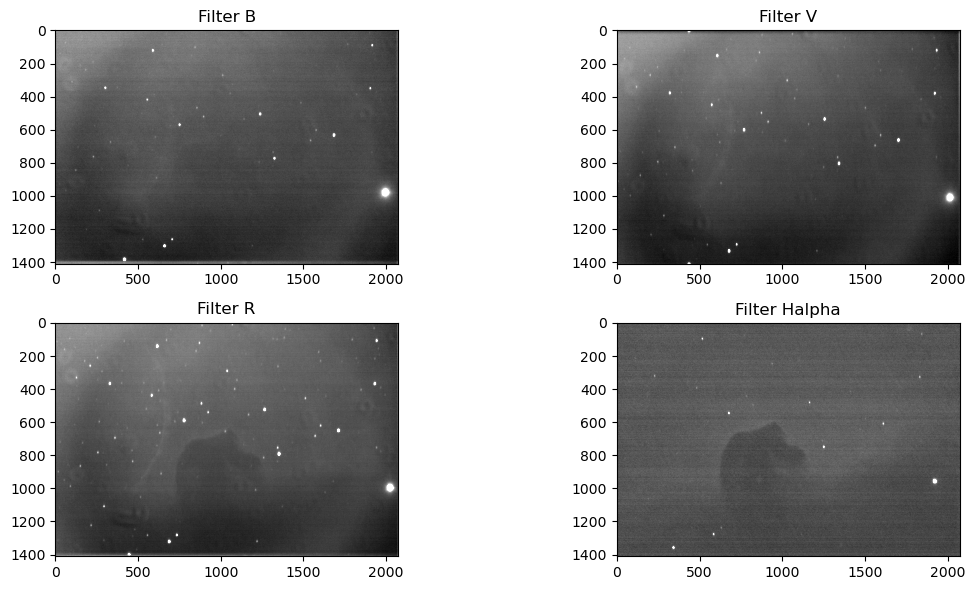

In [68]:
# Display the reduced, aligned, and combined images the Horse Head Nebula
norm_final_horsehead_b = ImageNormalize(final_horsehead_b, interval=ZScaleInterval())
norm_final_horsehead_v = ImageNormalize(final_horsehead_v, interval=ZScaleInterval())
norm_final_horsehead_r = ImageNormalize(final_horsehead_r, interval=ZScaleInterval())
norm_final_horsehead_halpha = ImageNormalize(final_horsehead_halpha, interval=ZScaleInterval())

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6), tight_layout=True)

ax[0,0].imshow(final_horsehead_b, cmap='gray', norm=norm_final_horsehead_b)
ax[0,1].imshow(final_horsehead_v, cmap='gray', norm=norm_final_horsehead_v)
ax[1,0].imshow(final_horsehead_r, cmap='gray', norm=norm_final_horsehead_r)
ax[1,1].imshow(final_horsehead_halpha, cmap='gray', norm=norm_final_horsehead_halpha)

# Clip the image to zoom in into the desired object

ax[0,0].set_title('Filter B')
ax[0,1].set_title('Filter V')
ax[1,0].set_title('Filter R')
ax[1,1].set_title('Filter Halpha')

plt.show()

The final step we need to do in our image alignment and combination process is to aligne the final images per filter to each other. The thought process is the same as before, since these images were collected at different times for each filter, we have to account for the telescope drifting. So, we are going to put these images into a list and then call our rolling function one more time.

In [72]:
# Add the final median combined science images to a list
final_jupiter_images = [final_jupiter_b, final_jupiter_v, final_jupiter_r, final_jupiter_i]
final_horsehead_images = [final_horsehead_b, final_horsehead_v, final_horsehead_r, final_horsehead_halpha]

# Align the final images to each other
aligned_final_jupiter_images = align_images(final_jupiter_images)
aligned_final_horsehead_images = align_images(final_horsehead_images)

Once the images have been align, and we know that the final images per filter are also aligned with each other, we can now move on to the final step, which is creating the color image.

<h1> Making an RGB Image </h1>

The final step for this exercise is to combine the reduced images into one to make a color image. In this section, we are going to learn how we can combine the images into one by using the `Numpy` function `dstack` as well as considering different methods to make the color on our images pop. Additionally, we will learn how to deal with situations when we have more filters than the regular RGB.

When stacking the reduced single images per filter, the order that we place these images matter if we want our final image to have the real color. On the `dstack` function, we should separate the individual images into their respective color channel, that is:

- Red - Filter R, Filter I, and/or Filter Halpha
- Green - Filter V
- Blue - Filter B

Then, we should stack them following the Red-Green-Blue order. For now, we are going to use the R, V, and B filters

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


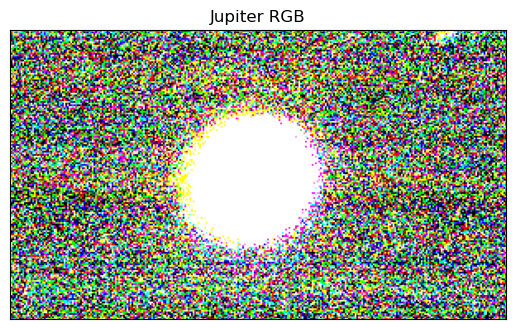

In [101]:
# Separate the images into their respective channels
jupiter_red = aligned_final_jupiter_images[2]
jupiter_green = aligned_final_jupiter_images[1]
jupiter_blue = aligned_final_jupiter_images[0]

# Stack the images into a single color image
jupiter_rgb = np.dstack((jupiter_red, jupiter_green, jupiter_blue))

# Display the final RGB image
plt.imshow(jupiter_rgb, origin='lower')

plt.xlim(1200, 1500)
plt.ylim(600,775)

plt.title('Jupiter RGB')
plt.xticks([])
plt.yticks([])

plt.show()

Well, that doesn't look like a pretty color image of Jupiter. Why? First, let's look at the warning we have on top of the image. It says *Clipping input data to the valid range for imshow with RGB data*. In the case of floats, we want the image values for each filter to be between 0 and 1. Thus, we can normalize each channel to 1 by dividing by its max value.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


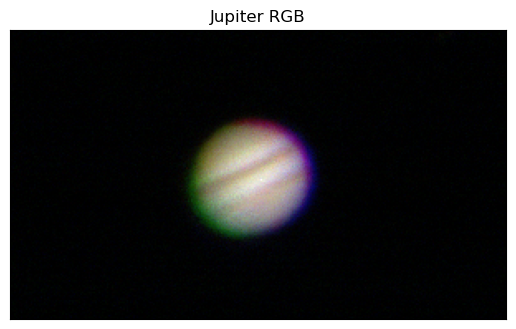

In [102]:
# Separate the images into their respective channels and normalize them
jupiter_red = aligned_final_jupiter_images[2] / aligned_final_jupiter_images[2].max()
jupiter_green = aligned_final_jupiter_images[1] / aligned_final_jupiter_images[1].max()
jupiter_blue = aligned_final_jupiter_images[0] / aligned_final_jupiter_images[0].max()

# Stack the normalized filters into a RGB image
jupiter_rgb = np.dstack((jupiter_red, jupiter_green, jupiter_blue))

# Display the final RGB image
plt.imshow(jupiter_rgb, origin='lower')

plt.xlim(1200, 1500)
plt.ylim(600,775)

plt.title('Jupiter RGB')
plt.xticks([])
plt.yticks([])

plt.show()

This looks much better now, we can see the detais of the bands of Jupiter. Of course you don't have to normalize the image to the maximum value of each filter, you can play with the numbers and see what value gives you the best image.

Now let's apply the same technique to the Horese Head nebula data and see the results

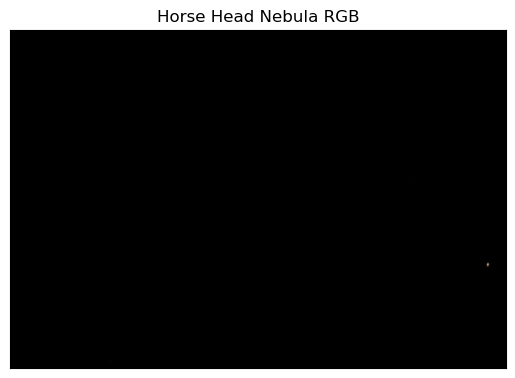

In [116]:
# Separate the images into their respective channels and normalize them
horsehead_red = aligned_final_horsehead_images[2] / aligned_final_horsehead_images[2].max()
horsehead_green = aligned_final_horsehead_images[1] / aligned_final_horsehead_images[1].max()
horsehead_blue = aligned_final_horsehead_images[0] / aligned_final_horsehead_images[0].max()

# Stack the normalized filters into a RGB image
horsehead_rgb = np.dstack((horsehead_red, horsehead_green, horsehead_blue))

# Display the final RGB image
plt.imshow(horsehead_rgb)

plt.title('Horse Head Nebula RGB')
plt.xticks([])
plt.yticks([])

plt.show()

There is nothing here. Maybe the normalization by the max value only works for objects that are very bright, like Jupiter. Since the Horse Head nebula is a very faint object, we have to consider a different approach to make the color pop.

What we can try to do is to play around with the brightness, contrast, and stretch of the images per filter. First, we are going to normalize each filter to the ZScale scale and use the vmin and vmax values by this scale to normalize the image. Then in order to play with the brightness, contrast and stretch of the filters, we can add a random value to the normalized image to increase or decrease the brightness. On the other hand, we can multiply the image by some random factor to change its contrast. Finally, we can raise the image to the power of some number to stretch it and alter the highlights and shadows of the image.

Since we have to repeat the steps for each of these filters, let us define a function that can do these steps for us and where we can change the values for brightness, contrast, and stretch levels:

In [509]:
# Define the image re-scaling function
def image_scaling(image, brightness=0.0, contrast=1.0, stretch=1.0):
    
    """
    Scale and adjust the brightness, contrast, and stretch of a 2D image array.

    Parameters:
    - image (ndarray): 2D array representing the image.
    - brightness (float): Brightness adjustment factor. Positive values increase brightness, negative values decrease brightness.
    - contrast (float): Contrast adjustment factor. Multiplies the normalized image data to increase or decrease contrast.
    - stretch (float): Stretch adjustment factor. Exponent applied to the normalized and adjusted image data to further enhance or compress contrast.

    Returns:
    - ndarray: Final image array after applying brightness, contrast, and stretch adjustments.

    Notes:
    - This function first normalizes the input image to the vmax level based on the ZScale scale.
    - Then, it applies the provided brightness, contrast, and stretch adjustments to the normalized image.
    - The formula used for adjustment is ((contrast * normalized_image) + brightness)**stretch.
    - Adjustments are applied linearly for brightness and contrast, and non-linearly for stretch.

    Example:
    >>> final_image = image_scaling(image_data, brightness=0.1, contrast=1.2, stretch=0.8)
    """
    
    # Find the vmin and vmax values of the image based on the XScale scale
    zscale_norm = ImageNormalize(image, interval=ZScaleInterval())
    vmin, vmax = zscale_norm.vmin, zscale_norm.vmax
    
    # Normalize the image to the vmax level
    image_norm = image / vmax
    
    # Add brighness, contrast, and stretch to the normalized image and create the final image
    final_image = ((contrast * image_norm) + brightness)**stretch
    
    return final_image

# Apply the re-scaling function to the individial frames of the Horse head nebula
horsehead_rescaled_r = image_scaling(aligned_final_horsehead_images[2], -1.2, 1.7, 1.0)
horsehead_rescaled_g = image_scaling(aligned_final_horsehead_images[1], -1.0, 1.5, 1.6)
horsehead_rescaled_b = image_scaling(aligned_final_horsehead_images[0], -0.75, 1.1, 2.0)

horsehead_final_rgb = np.dstack((horsehead_rescaled_r, horsehead_rescaled_g, horsehead_rescaled_b))

C:\Users\fmend\AppData\Local\Temp\ipykernel_6964\865792784.py:34: RuntimeWarning: invalid value encountered in power
  final_image = ((contrast * image_norm) + brightness)**strech


After we have created the final RGB image with the appropriate stretches per filter, we can visualize it. Also, keep in mind that you can apply the re-scale function to the final RGB image as well if you want to re-scale the general image. Let's look at the final result:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


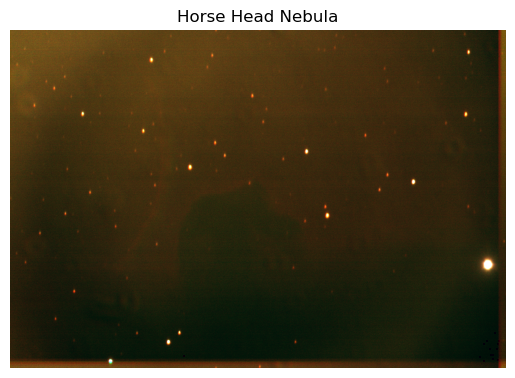

In [510]:
# Display the final re-scaled Horse Head nebula RGB image
plt.imshow(1.8*horsehead_final_rgb + 0.03)

plt.title('Horse Head Nebula')
plt.axis('off')

plt.show()

That's definitely much better that what we expected. You can play with the numbers more until you are satisfied with the color of the image. Remember that if you have stars on your image, these should have a realistic color. You don't want to see *green* or *pink* stars.

Now, remember that we did not only collect images of the Horse Head nebula on the B, V, and R filters, we also have data on the Halpha filter. So, how do we go about adding this 4th filter? Let's try using the traditional method using `np.dstack()`:

C:\Users\fmend\AppData\Local\Temp\ipykernel_6964\865792784.py:34: RuntimeWarning: invalid value encountered in power
  final_image = ((contrast * image_norm) + brightness)**strech
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


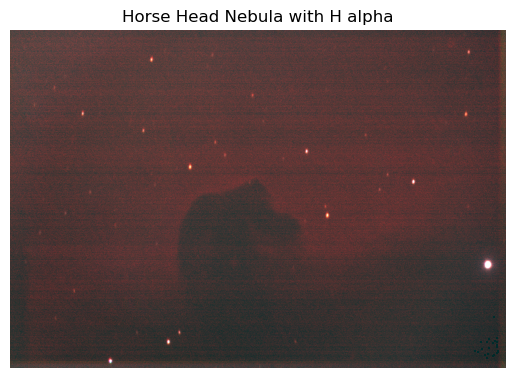

In [536]:
# Apply the re-scaling function to the individial frames of the Horse head nebula
horsehead_rescaled_r = image_scaling(aligned_final_horsehead_images[2], -0.5, 0.8, 0.7)
horsehead_rescaled_g = image_scaling(aligned_final_horsehead_images[1], -0.5, 0.85, 1.0)
horsehead_rescaled_b = image_scaling(aligned_final_horsehead_images[0], -0.5, 0.85, 1.0)
horsehead_rescaled_halpha = image_scaling(aligned_final_horsehead_images[3], -0.4, 1.2, 1.0)

# Stack the images of the horse head nebula in all 4 filter to create the RGB image
horsehead_4_filter_stack = np.dstack((horsehead_rescaled_halpha + horsehead_rescaled_r, 
                                      horsehead_rescaled_g, horsehead_rescaled_b))

plt.imshow(0.7*horsehead_4_filter_stack + 0.09)

plt.title('Horse Head Nebula with H alpha')
plt.axis('off')

plt.show()

This looks even better with the addition of the H alpha to the final image. But, notice what we did here: Because `np.dstack()` only takes 3 filters as part of the RGB stacking, we had to combine the H alpha filter with the R filter images by adding them together. This is not the only approach you can take, you could also average the 2 filters together, or median combine them. We decided to add them so no information on either filter was lost. 

Why did we add the H alpha filter to the R filter and not to any other filter? Simple, the wavelength that this filter peaks at is at around 656.2 nm, which is within the R filter band with, so it makes sense to combine these 2 together. If you have data in the I and R filters instead of H alpha, you can combine the I and R filters together, as these have close proximity to each other. If you have data in other narrow-band filters like SII or OIII, make sure you look at the wavelength that these filters peak at so you can pick the appropriate filter to combine them with.

<h1> Conclusion </h1>

In this noteboook we've learned how to load astronomical images from fits files and different ways we can visualize them to get the best display of the data we collected. We also learned how to perform image reduction and align our images to then later combine them into nice RGB images. FInally, we learned different ways we can create a RGB image depending on the brightness of our object and also how we can incorporate additional data taken with other filters, and also different ways that we can alter the brightness, contrast, and get the best possible color out.